In [3]:
import pandas as pd
df = pd.read_csv("kddcup99_csv.csv")
df.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal


In [4]:
X = df.drop(columns=["label"])
y = df['label']
df["label"].unique()

array(['normal', 'buffer_overflow', 'loadmodule', 'perl', 'neptune',
       'smurf', 'guess_passwd', 'pod', 'teardrop', 'portsweep', 'ipsweep',
       'land', 'ftp_write', 'back', 'imap', 'satan', 'phf', 'nmap',
       'multihop', 'warezmaster', 'warezclient', 'spy', 'rootkit'],
      dtype=object)

In [5]:
print('Number of missing values:',sum(df.isnull().sum()))

Number of missing values: 0


In [6]:

print("Shape of the dataset:", df.shape)
print("Data types and null values:\n", df.info())
df.describe()


Shape of the dataset: (494020, 42)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494020 entries, 0 to 494019
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494020 non-null  int64  
 1   protocol_type                494020 non-null  object 
 2   service                      494020 non-null  object 
 3   flag                         494020 non-null  object 
 4   src_bytes                    494020 non-null  int64  
 5   dst_bytes                    494020 non-null  int64  
 6   land                         494020 non-null  int64  
 7   wrong_fragment               494020 non-null  int64  
 8   urgent                       494020 non-null  int64  
 9   hot                          494020 non-null  int64  
 10  num_failed_logins            494020 non-null  int64  
 11  logged_in                    494020 non-null  int64  
 12  lnum_compromised       

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lnum_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494020.000000,4.940200e+05,4.940200e+05,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,...,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000
mean,47.979400,3.025616e+03,8.685308e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148245,0.010212,...,232.471248,188.666052,0.753781,0.030906,0.601936,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.747185,9.882191e+05,3.304003e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355343,1.798328,...,64.744601,106.040205,0.410780,0.109259,0.481309,0.042133,0.380593,0.380920,0.230590,0.230141
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Identify numeric and categorical features
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=[object]).columns.tolist()

# Encode categorical features
for col in categorical_features:
    X[col] = label_encoder.fit_transform(X[col])

X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.dropna(inplace=True)
X.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,1,22,9,181,5450,0,0,0,0,...,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0
1,0,1,22,9,239,486,0,0,0,0,...,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0
2,0,1,22,9,235,1337,0,0,0,0,...,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
3,0,1,22,9,219,1337,0,0,0,0,...,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
4,0,1,22,9,217,2032,0,0,0,0,...,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [9]:
from sklearn.decomposition import PCA
# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
n_components = np.argmax(cumulative_variance >= 0.9) + 1

# Perform PCA with the number of components for 90% variance
pca = PCA(n_components=n_components)
features_reduced= pca.fit_transform(X_scaled)
features_reduced_df = pd.DataFrame(features_reduced, columns=[f'PC{i+1}' for i in range(features_reduced.shape[1])])
features_reduced_df.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
0,-0.513084,0.977722,4.067385,-0.663423,-0.374905,-0.128675,-0.072698,0.084694,-0.618522,-0.238912,-0.000559,0.118074,-0.039558,0.275749,0.193031,-0.083022,0.236779
1,-0.515066,0.959544,4.035352,-0.663975,-0.367439,-0.132565,-0.111458,0.050506,-0.667012,-0.226942,-0.004928,-0.015223,-0.081151,0.326198,0.231632,-0.060796,0.252166
2,-0.495386,0.940242,3.991926,-0.656003,-0.358907,-0.127876,-0.116468,0.056837,-0.714018,-0.228117,-0.004520,0.002833,-0.069474,0.359412,0.229092,-0.060102,0.250353
3,-0.468853,0.920958,3.943721,-0.648045,-0.349663,-0.118160,-0.124952,0.057093,-0.752694,-0.226808,-0.004803,-0.000395,-0.066067,0.389911,0.232505,-0.057845,0.249982
4,-0.443717,0.901051,3.895472,-0.639386,-0.340628,-0.111218,-0.130074,0.062229,-0.795445,-0.227368,-0.004510,0.014010,-0.056051,0.420965,0.230707,-0.057044,0.248064


In [10]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

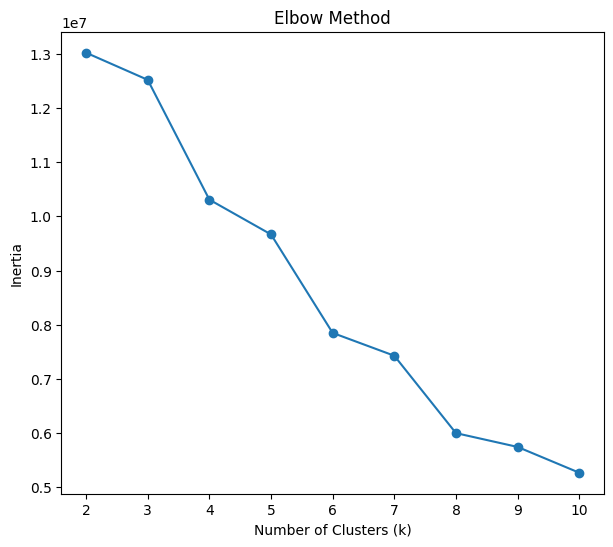

In [11]:
inertia = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_reduced)
    inertia.append(kmeans.inertia_)

# Plot inertia (Elbow Method)
plt.figure(figsize=(7, 6))
plt.plot(k_values, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()

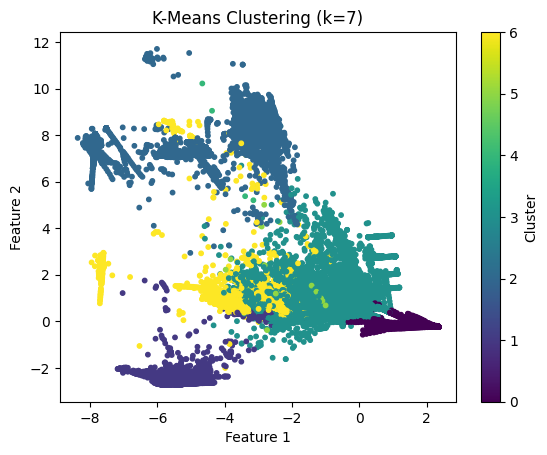

In [12]:
optimal_k = 7
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(features_reduced)

features_reduced_df['Cluster'] = kmeans.labels_
plt.scatter(features_reduced_df.iloc[:, 0], features_reduced_df.iloc[:, 1], c=features_reduced_df['Cluster'], cmap='viridis', s=10)
plt.title(f'K-Means Clustering (k={optimal_k})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()

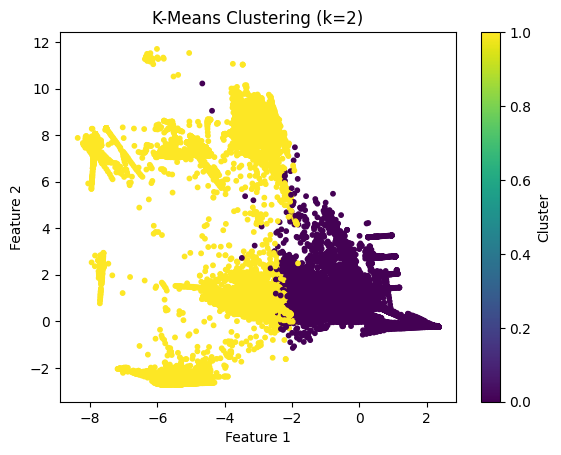

In [13]:
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(features_reduced)

features_reduced_df['Cluster'] = kmeans.labels_
plt.scatter(features_reduced_df.iloc[:, 0], features_reduced_df.iloc[:, 1], c=features_reduced_df['Cluster'], cmap='viridis', s=10)
plt.title(f'K-Means Clustering (k={optimal_k})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()

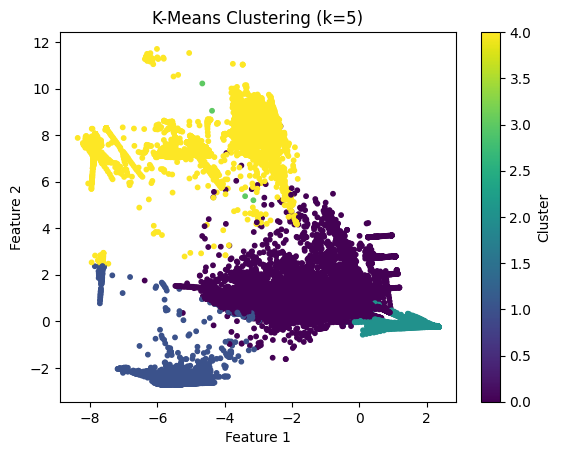

In [14]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(features_reduced)

features_reduced_df['Cluster'] = kmeans.labels_
plt.scatter(features_reduced_df.iloc[:, 0], features_reduced_df.iloc[:, 1], c=features_reduced_df['Cluster'], cmap='viridis', s=10)
plt.title(f'K-Means Clustering (k={optimal_k})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()

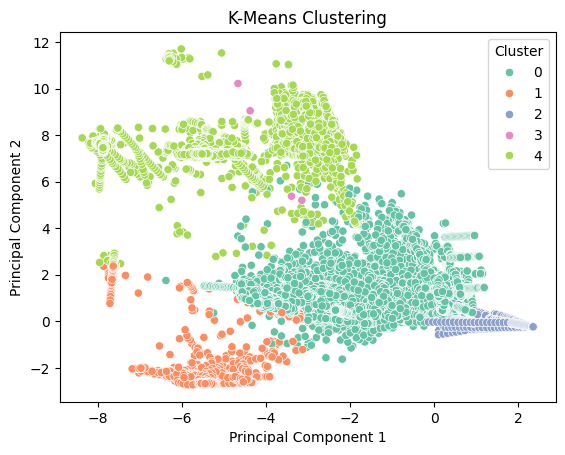

In [21]:
# Use corrected indexing and column names for scatter plot
sns.scatterplot(
    x=features_reduced_df['PC1'],  # Use column name for the first principal component
    y=features_reduced_df['PC2'],  # Use column name for the second principal component
    hue=features_reduced_df['Cluster'],  # Use the correct cluster column
    palette='Set2',
    legend='full'
)
plt.title("K-Means Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()



In [ ]:
from sklearn.cluster import DBSCAN

features = ['dst_bytes', 'src_bytes', 'urgent', 'dst_host_same_srv_rate','dst_host_diff_srv_rate']
x= df[features]

x.head()
x = x.sample(frac=0.1,random_state=42)

,src_bytes,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate
317920,1032,255,1.00,0.00
171422,1032,255,1.00,0.00
381807,0,9,0.04,0.08
87346,345,255,1.00,0.00
57449,0,2,0.01,0.07


In [41]:
from sklearn.cluster import DBSCAN

# Define DBSCAN parameters
eps = 0.5  # Adjust based on your data
min_samples = 10  # Minimum points to form a dense region

# Perform clustering
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
cluster_labels = dbscan.fit_predict(x)

# Add cluster labels to the DataFrame
x['Cluster'] = cluster_labels


In [42]:
# Identify and count noise points (cluster label: -1)
noise_points = x[x['Cluster'] == -1]
print(f"Number of noise points: {len(noise_points)}")


Number of noise points: 3831


In [ ]:
# Save the dataset with cluster labels
x.to_csv('kdd_data_with_clusters.csv', index=False)
print("Clustered data saved as 'kdd_data_with_clusters.csv'")


In [ ]:
import matplotlib.pyplot as plt

# Scatter plot for cluster visualization
plt.scatter(
    x.iloc[:, 0],  # First feature
    x.iloc[:, 1],  # Second feature
    c=cluster_labels,
    cmap='viridis',
    s=10
)

plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1 (dst_bytes)')
plt.ylabel('Feature 2 (src_bytes)')
plt.colorbar(label='Cluster Label')
plt.show()


In [ ]:
import numpy as np

# Align cluster labels and ground truth
y_encoded_sampled = y_encoded[:len(x)]
cluster_labels = cluster_labels[:len(y_encoded_sampled)]

# Unique clusters and labels
unique_clusters = np.unique(cluster_labels)
unique_labels = np.unique(y_encoded_sampled)

# Initialize the cost matrix
cost_matrix = np.zeros((len(unique_clusters), len(unique_labels)))

# Populate the cost matrix
for i, cluster in enumerate(unique_clusters):
    for j, label in enumerate(unique_labels):
        # Mask for cluster and label
        mask_cluster = (cluster_labels == cluster)
        mask_label = (y_encoded_sampled == label)

        # Compute the cost
        cost_matrix[i, j] = np.sum(mask_cluster != mask_label)

# Solve the linear sum assignment problem
from scipy.optimize import linear_sum_assignment
row_ind, col_ind = linear_sum_assignment(cost_matrix)

# Map clusters to true labels
label_map = {unique_clusters[row]: unique_labels[col] for row, col in zip(row_ind, col_ind)}

# Remap cluster labels
y_pred_mapped = np.array([label_map[label] if label in label_map else -1 for label in cluster_labels])


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1 score
precision = precision_score(y_encoded_sampled, y_pred_mapped, average='weighted')
recall = recall_score(y_encoded_sampled, y_pred_mapped, average='weighted')
f1 = f1_score(y_encoded_sampled, y_pred_mapped, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
